In [63]:
import sys

sys.path.append("../../")
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 성능 측정 지표 모듈
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

In [64]:
# 그래프 한글 설정
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [65]:
origin = read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
origin.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135


In [66]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


In [67]:
origin_corr = origin.corr()
origin_corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [68]:
cor_order = origin_corr.loc[:'s6', 'target'].abs().sort_values(ascending=False)

In [69]:
cor_order

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s3     0.394789
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: target, dtype: float64

In [70]:
names = ['target', 'bmi', 's5', 'bp', 's4', 's3', 's6', 's1', 'age']
diabetes_df_l = origin.loc[:, names]

In [71]:
y = origin[['target']]
y.head()

,target
0,151
1,75
2,141
3,206
4,135


In [72]:
from sklearn.model_selection import train_test_split

x_data=origin.loc[:, ['bmi', 's5', 'bp', 's4', 's5', 's6', 's1', 'age']]
y_data=origin.loc[:, 'target']

x_train, x_test, y_train, y_test=train_test_split(x_data, y, test_size=0.3, random_state=1)

In [73]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[ 633.94882866  272.11297697  281.86624319  154.68135477  272.11297697
    30.92192411 -234.94863462  -31.09669014]]
절편:  [151.36446413]
훈련 데이터 설명력:  0.5253332572164804
검증 데이터 설명력:  0.41237252098104304


In [74]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([278.67928162, 145.72099899, 184.18230428, 160.3922974 ,
       170.20916902, 129.93352668,  67.57237295, 247.80506256,
       100.53846024, 175.04247065,  97.76565129, 137.67437741,
       130.73889945, 104.39287955, 146.35063365, 179.08652415,
       163.59241528, 242.2948151 , 181.68544722, 197.09234632,
       142.36262267, 145.07795809, 106.86470891, 173.42697337,
       175.60119418,  55.54719962,  66.87358041, 127.36672812,
       170.66422187, 119.94087861,  94.78307288, 139.719543  ,
       236.51946402, 175.80101022, 210.53112613,  92.86763808,
        61.52716119, 161.91070109, 155.56751789, 100.16864305,
       186.90197365,  80.80403477, 176.47841242, 267.1295999 ,
       120.35217169, 175.38689587, 145.32469052, 207.9715133 ,
       134.93375455, 209.70885524, 114.18699314, 215.73554894,
       135.8160922 , 120.7498365 , 173.91944496, 158.33927016,
       126.09144836, 122.64146007,  64.57915215, 163.55560344,
       254.17813751, 199.33478494, 168.44260832, 209.09

In [75]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([114.74179679, 104.26232409, 181.60719422,  63.39831082,
       176.52834683, 197.50777048, 228.01210498, 126.88251231,
       159.01051803, 114.11993112, 201.59062038, 179.41751593,
       103.76442085,  99.85709393, 222.54459858, 194.35955263,
       185.59139606,  95.11667437, 113.91638693, 175.88641528,
       187.46658269,  75.3616027 , 131.66884263, 101.97195475,
        82.40392617, 205.30629724,  93.15492255, 168.25496725,
       120.81875127, 184.84380818, 160.61761546, 126.22132428,
       208.1137016 ,  98.79634718, 144.25078741, 196.01046266,
        92.54654489, 237.55879426, 160.20045602, 187.35743029,
       170.96038383, 195.3744471 , 130.16942406, 130.84558283,
       140.70767658, 176.961642  , 150.04415124, 123.56398957,
       201.14648133, 201.79344061,  87.18188289, 146.47877481,
       115.87193196, 134.54932867, 195.83755532, 130.50900537,
       152.94928437,  91.52693506,  47.51603695,  79.87042513,
       113.84983797, 221.11868168, 172.93843181, 103.61

In [76]:
y_test

,target
246,78
425,152
293,200
31,59
359,311
...,...
340,216
39,90
191,178
320,122


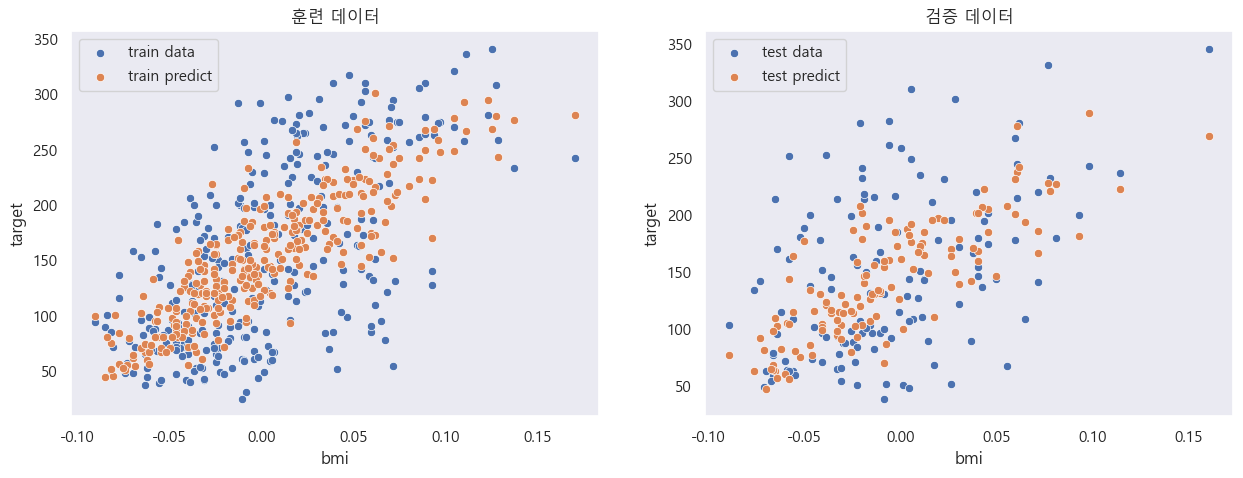

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_train['bmi'], y=y_train['target'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['bmi'], y=y_train_pred, label='train predict', ax=ax1)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax1.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)
# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()


# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['bmi'], y=y_test['target'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['bmi'], y=y_test_pred, label='test predict', ax=ax2)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

In [78]:
olsResult = helper.ml_ols(origin, xnames='bmi', yname='target', degree=2, test_size=0.3, random_state=42)
print("계수:", olsResult.coef)
print("절편:", olsResult.intercept)

계수: [[959.15277389 881.83288498]]
절편: [149.08951505]


In [79]:
print("R^2: ", olsResult.trainRegMetric.r2)
print("MAE: ", olsResult.trainRegMetric.mae)
print("MSE: ", olsResult.trainRegMetric.mse)
print("RMSE: ", olsResult.trainRegMetric.rmse)
print("MAPE: ", olsResult.trainRegMetric.mape)
print("MPE: ", olsResult.trainRegMetric.mpe)

R^2:  0.3668374933864168
MAE:  51.883089124955305
MSE:  3892.861538760486
RMSE:  62.392800376008815
MAPE:  48.21723235280281
MPE:  -24.907596288464557


In [80]:
print("R^2: ", olsResult.testRegMetric.r2)
print("MAE: ", olsResult.testRegMetric.mae)
print("MSE: ", olsResult.testRegMetric.mse)
print("RMSE: ", olsResult.testRegMetric.rmse)
print("MAPE: ", olsResult.testRegMetric.mape)
print("MPE: ", olsResult.testRegMetric.mpe)

R^2:  0.27657299212021424
MAE:  50.69705954713796
MSE:  3905.2816317953525
RMSE:  62.49225257418197
MAPE:  43.87559317430129
MPE:  -18.927567510339497


In [81]:
olsResult = helper.ml_ols(origin, xnames='s5', yname='target', degree=2, test_size=0.3, random_state=42)
print("계수:", olsResult.coef)
print("절편:", olsResult.intercept)

계수: [[  893.65146258 -1770.87539528]]
절편: [156.25510944]


In [82]:
train = read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
train.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rent              3539 non-null   int64  
 1   bedrooms          3539 non-null   float64
 2   bathrooms         3539 non-null   int64  
 3   size_sqft         3539 non-null   int64  
 4   min_to_subway     3539 non-null   int64  
 5   floor             3539 non-null   float64
 6   building_age_yrs  3539 non-null   int64  
 7   no_fee            3539 non-null   int64  
 8   has_roofdeck      3539 non-null   int64  
 9   has_washer_dryer  3539 non-null   int64  
 10  has_doorman       3539 non-null   int64  
 11  has_elevator      3539 non-null   int64  
 12  has_dishwasher    3539 non-null   int64  
 13  has_patio         3539 non-null   int64  
 14  has_gym           3539 non-null   int64  
 15  neighborhood      3539 non-null   object 
 16  borough           3539 non-null   object 


In [84]:
train = train.drop(['neighborhood', 'borough'], axis=1)
train.describe()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
# MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# MinManxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 셋 변환. fit()과 transfrom() 호출
scaler.fit(train)
train_scaled = scaler.transform(train)
train = pd.DataFrame(train_scaled)

In [86]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,0.205291,0.270387,0.273354,0.151588,0.115602,0.143474,0.288861,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,0.169135,0.193519,0.119918,0.105044,0.128223,0.132059,0.218780,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.098930,0.200000,0.200000,0.079780,0.046512,0.048193,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.144385,0.200000,0.200000,0.120879,0.093023,0.096386,0.216667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.251337,0.400000,0.400000,0.195824,0.139535,0.204819,0.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
train.columns = ['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway',	'floor', "uilding_age_yrs",	'no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']
train.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,uilding_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.066845,0.0,0.2,0.050549,0.209302,0.024096,0.094444,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.545455,0.4,0.4,0.384615,0.093023,0.012048,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.171123,0.2,0.2,0.146374,0.046512,0.614458,0.161111,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.186898,0.2,0.2,0.159341,0.069767,0.096386,0.172222,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0.866310,0.4,0.4,1.000000,0.069767,0.048193,0.755556,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [88]:
train_corr = train.corr()
train_corr

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,uilding_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rent,1.000000,0.638336,0.769474,0.857954,0.035164,0.215867,-0.128895,-0.101497,0.035165,0.053873,0.031302,0.051860,0.052241,0.029302,0.040609
bedrooms,0.638336,1.000000,0.720885,0.771263,0.076543,0.043539,0.037228,-0.100352,0.002938,0.008721,-0.017331,-0.006771,0.005467,0.003037,-0.004112
bathrooms,0.769474,0.720885,1.000000,0.803627,0.086932,0.127969,-0.095421,-0.062205,0.019556,0.025752,0.014745,0.021150,0.038829,0.042304,0.029739
size_sqft,0.857954,0.771263,0.803627,1.000000,0.039448,0.107186,0.014489,-0.141451,0.024822,0.038263,0.026098,0.040916,0.050364,0.021921,0.029347
min_to_subway,0.035164,0.076543,0.086932,0.039448,1.000000,0.082445,-0.184682,0.080088,-0.020693,-0.001327,-0.009012,-0.000410,-0.012244,0.001500,-0.004315
floor,0.215867,0.043539,0.127969,0.107186,0.082445,1.000000,-0.389260,0.104317,0.056322,0.038870,0.095963,0.068917,0.002337,0.059423,0.065410
uilding_age_yrs,-0.128895,0.037228,-0.095421,0.014489,-0.184682,-0.389260,1.000000,-0.221429,-0.041305,-0.030014,-0.047265,-0.060627,-0.027420,-0.050321,-0.063110
no_fee,-0.101497,-0.100352,-0.062205,-0.141451,0.080088,0.104317,-0.221429,1.000000,-0.095718,-0.070324,-0.182547,-0.161519,-0.078660,-0.049684,-0.101230
has_roofdeck,0.035165,0.002938,0.019556,0.024822,-0.020693,0.056322,-0.041305,-0.095718,1.000000,0.313459,0.489836,0.516534,0.331999,0.122568,0.561626
has_washer_dryer,0.053873,0.008721,0.025752,0.038263,-0.001327,0.038870,-0.030014,-0.070324,0.313459,1.000000,0.328291,0.379999,0.455166,0.140979,0.348433


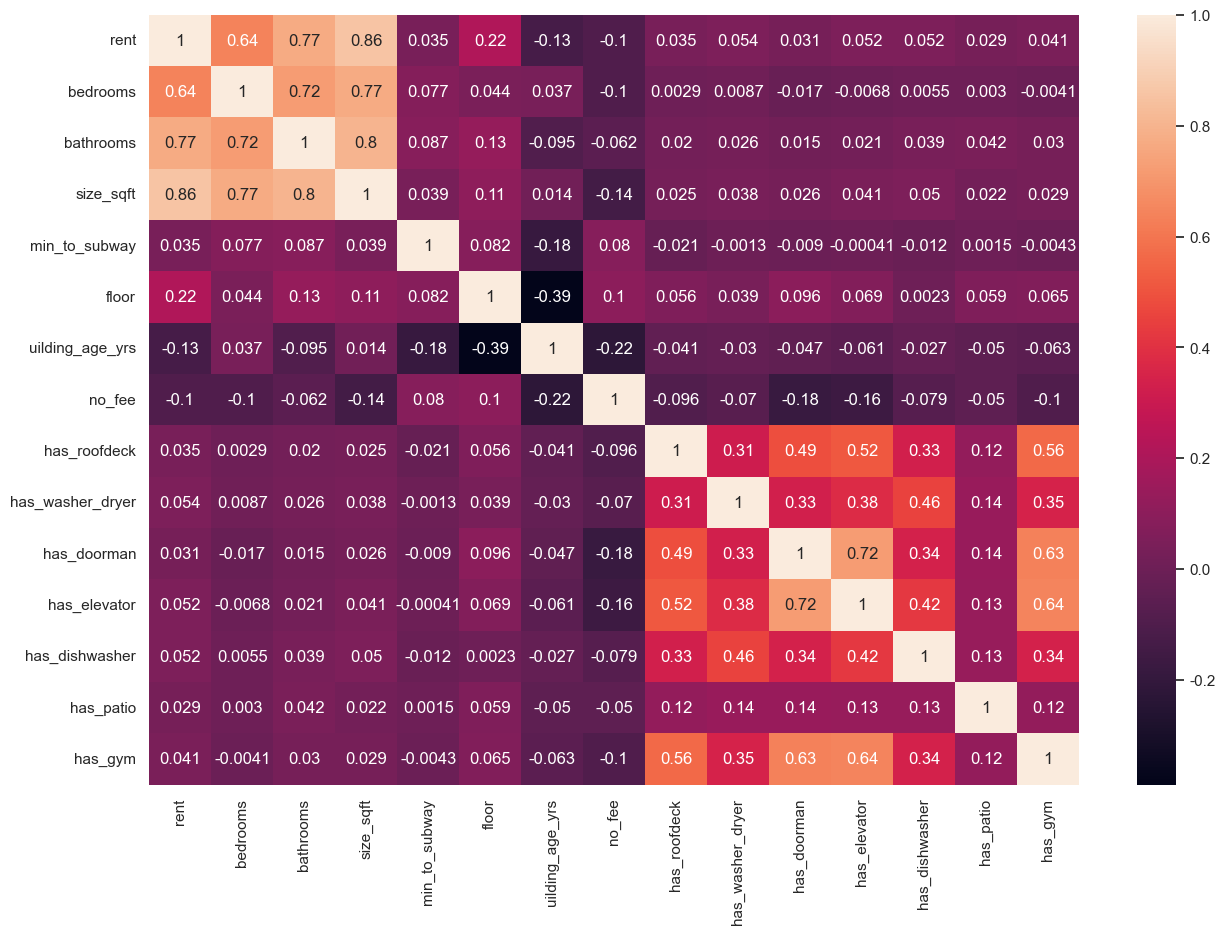

In [89]:
# 상관계수 히트맵
import seaborn as sns
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(15,10))
sns.set(font_scale=1.0)
sns.heatmap(train.corr(), annot=True, cbar=True)
plt.show()

In [90]:
# bedrooms, bathrooms, size_sqft, floor
y = train[['rent']]
y.head()

,rent
0,0.066845
1,0.545455
2,0.171123
3,0.186898
4,0.866310


In [91]:
train.columns

Index(['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'uilding_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')

In [92]:
x_data=train.loc[:, ['bedrooms', 'bathrooms', 'size_sqft', 'floor']]

x_train, x_test, y_train, y_test=train_test_split(x_data, y, test_size=0.3, random_state=1)

In [93]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[-0.0992499   0.35204776  1.19964875  0.13481777]]
절편:  [-0.06520319]
훈련 데이터 설명력:  0.7741683707100895
검증 데이터 설명력:  0.7650992800241004


In [94]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([0.18797361, 0.32741413, 0.14338203, ..., 0.12111223, 0.10220886,
       0.2540605 ])

In [95]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([0.19284654, 0.29126499, 0.18275168, ..., 0.09678993, 0.18559542,
       0.37341334])

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: U

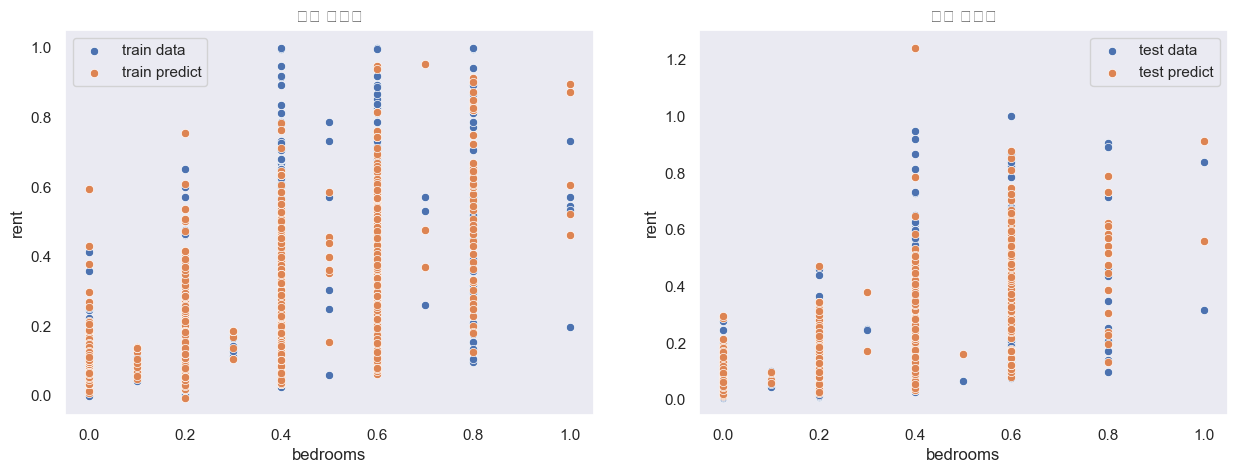

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_train['bedrooms'], y=y_train['rent'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['bedrooms'], y=y_train_pred, label='train predict', ax=ax1)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax1.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)
# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()


# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['bedrooms'], y=y_test['rent'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['bedrooms'], y=y_test_pred, label='test predict', ax=ax2)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

In [98]:
olsResult = helper.ml_ols(train, xnames='bedrooms', yname='rent', degree=2, test_size=0.3, random_state=42)
print("계수:", olsResult.coef)
print("절편:", olsResult.intercept)

계수: [[0.42300449 0.2076366 ]]
절편: [0.06651821]


In [ ]:
print("R^2: ", olsResult.trainRegMetric.r2)
print("MAE: ", olsResult.trainRegMetric.mae)
print("MSE: ", olsResult.trainRegMetric.mse)
print("RMSE: ", olsResult.trainRegMetric.rmse)
print("MAPE: ", olsResult.trainRegMetric.mape)
print("MPE: ", olsResult.trainRegMetric.mpe)

R^2:  0.4010018472205461
MAE:  1620.7182807767692
MSE:  6056709.536369745
RMSE:  2461.0383045311883
MAPE:  34.32742430178531
MPE:  -15.76854894237218


In [ ]:
print("R^2: ", olsResult.testRegMetric.r2)
print("MAE: ", olsResult.testRegMetric.mae)
print("MSE: ", olsResult.testRegMetric.mse)
print("RMSE: ", olsResult.testRegMetric.rmse)
print("MAPE: ", olsResult.testRegMetric.mape)
print("MPE: ", olsResult.testRegMetric.mpe)

R^2:  0.43541429657642805
MAE:  1539.3620012045533
MSE:  5499541.18298477
RMSE:  2345.110057755237
MAPE:  31.193090213052823
MPE:  -11.399576811387863
